## Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading Data set

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data" 
df = pd.read_csv(url,header=None)

## Exploratory Data Analysis

In [3]:
df.head() # returns first five row of the dataset

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Changing column names as mentioned in data set description

In [4]:
df.columns = [ "Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

In [5]:
df.head() # Observing dataset after changing column names

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.info() # Data set informataion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**Encoding categroical columns**

In [7]:
df['Sex'].value_counts() # This column is categroical column containing values as Male, Female and infants

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [8]:
data = pd.get_dummies(df, columns=['Sex']) # Encoding using pandas dummies

In [9]:
data.head() # Dataset after encoding categroical columns

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [10]:
data.columns # Observing columns of data set after encoding

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [11]:
data_corr=data.corr() # returns correlation for dataset

**Heat map indicating correlation between all features and target variable**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Length'),
  Text(1.5, 0, 'Diameter'),
  Text(2.5, 0, 'Height'),
  Text(3.5, 0, 'Whole weight'),
  Text(4.5, 0, 'Shucked weight'),
  Text(5.5, 0, 'Viscera weight'),
  Text(6.5, 0, 'Shell weight'),
  Text(7.5, 0, 'Rings'),
  Text(8.5, 0, 'Sex_F'),
  Text(9.5, 0, 'Sex_I'),
  Text(10.5, 0, 'Sex_M')])

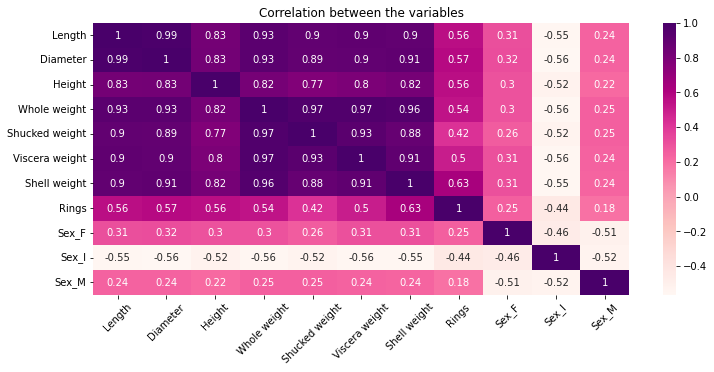

In [12]:
plt.subplots(figsize=(12,5))
genddata_corr=data.corr()
sns.heatmap(data_corr,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

**Visulization of relation between features and columns**

<AxesSubplot:xlabel='Length', ylabel='Rings'>

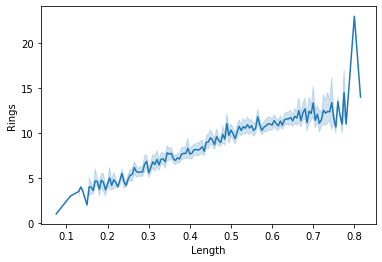

In [13]:
sns.lineplot(data=data, x="Length", y="Rings")

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

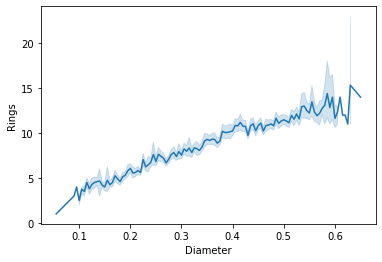

In [14]:
sns.lineplot(data=data, x="Diameter", y="Rings")

<AxesSubplot:xlabel='Height', ylabel='Rings'>

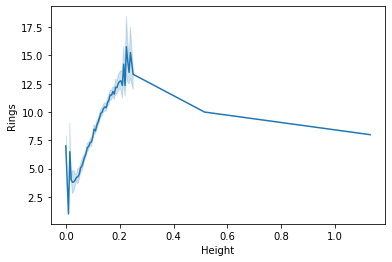

In [15]:
sns.lineplot(data=data, x="Height", y="Rings")

## Seperating Features and Target variable

In [16]:
X = data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']].to_numpy()
y = data["Rings"].to_numpy()

**Converting X and y to numpy arrays for faster computation**

## Seperating train and test parts

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
#print(X_test.shape)

## MSE vs K value in KNeighborsRegressor

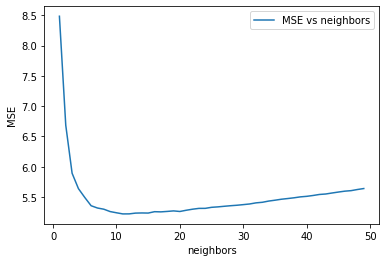

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
K = list(range(1,50))
MSE=[]
for i in (K):
  knn = KNeighborsRegressor(i)
  y_pred= cross_val_predict(knn,X,y,cv=5)
  MSE.append(mean_squared_error(y,y_pred))
plt.plot(K,MSE,label='MSE vs neighbors')
plt.ylabel('MSE')
plt.xlabel('neighbors')
plt.legend()



In [19]:
print("The MSE value is minimum for model with",MSE.index(min(MSE)),"neighbors")

The MSE value is minimum for model with 10 neighbors


In [25]:
print(f"With the value of  ", min(MSE))

With the value of   5.220861189868959


## Grid Search  for optmizing K value and other hyper-parameters in K Neighbors Regressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


# Intiating a list for K values
K = list(range(1,30))

# Intiating a list for leaf values
leaf_size = list(range(1,10))
weights=['uniform', 'distance']

#Converting K values into  dictionary
hyperparameters = dict(n_neighbors=K,leaf_size=leaf_size,weights=weights)

#Creating a KNN Regressor
knn_2 = KNeighborsRegressor()

#Implementing Grid search
tuning = GridSearchCV(knn_2, hyperparameters, cv=5)

#Fitting the model on data
best_model = tuning.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best possible value of K is:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best possible value of leaf_size is is:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best possible value of weights is is:', best_model.best_estimator_.get_params()['weights'])

Best possible value of K is: 17
Best possible value of leaf_size is is: 1
Best possible value of weights is is: distance


In [21]:
results = pd.DataFrame(tuning.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009939,0.009930,0.033367,0.003576,1,1,uniform,"{'leaf_size': 1, 'n_neighbors': 1, 'weights': ...",0.099106,0.299400,0.277155,0.257730,0.041874,0.195053,0.104141,505
1,0.009597,0.007422,0.022981,0.007058,1,1,distance,"{'leaf_size': 1, 'n_neighbors': 1, 'weights': ...",0.099106,0.299400,0.277155,0.257730,0.041874,0.195053,0.104141,505
2,0.015720,0.000159,0.028212,0.006300,1,2,uniform,"{'leaf_size': 1, 'n_neighbors': 2, 'weights': ...",0.380262,0.410225,0.415339,0.449712,0.350591,0.401226,0.033569,487
3,0.012509,0.006255,0.035419,0.005909,1,2,distance,"{'leaf_size': 1, 'n_neighbors': 2, 'weights': ...",0.377112,0.414653,0.410984,0.447322,0.345090,0.399032,0.034954,496
4,0.010367,0.005815,0.048277,0.009991,1,3,uniform,"{'leaf_size': 1, 'n_neighbors': 3, 'weights': ...",0.438255,0.442332,0.450312,0.514990,0.419863,0.453150,0.032494,469


In [22]:
tuning.best_params_

{'leaf_size': 1, 'n_neighbors': 17, 'weights': 'distance'}

In [23]:
tuning.best_score_

0.5350054367191776

In [29]:
print("The best MSE: ") 
tuning.best_score_

The best MSE: 


0.5350054367191776